In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm

In [2]:
df = pd.read_csv("Salary_dataset.csv")
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [3]:
# Step 3: Quick cleanup (drop index/year/month columns)
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
print("\nAfter dropping extra columns:\n", df.head())


After dropping extra columns:
    YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

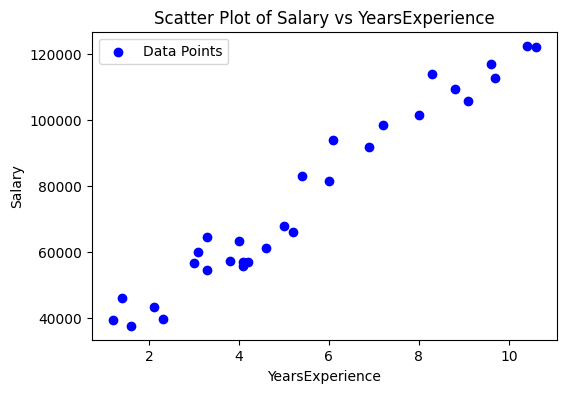

In [5]:
plt.figure(figsize=(6,4))
plt.scatter(df["YearsExperience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs YearsExperience")
plt.legend()
plt.show()

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


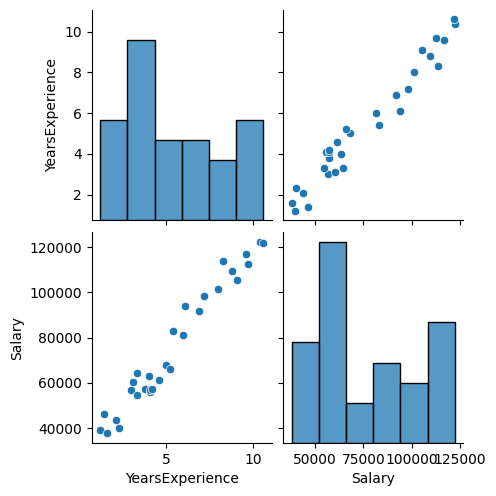

In [7]:
sns.pairplot(df)

In [8]:
X = df[['YearsExperience']]
Y = df['Salary']

In [9]:
print(type(df["YearsExperience"]))
print(type(df["Salary"]))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = 0.25, random_state = 42
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (22, 1)
Test Shape: (8, 1)


In [11]:
# Train model
model = LinearRegression()
model.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
# Predictions
Y_pred = model.predict(X_test)

In [13]:
# Evaluation
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

print("\nModel Evaluation:")
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("R2 Score:", r2_score(Y_test, Y_pred))


Intercept: 24542.025828030717
Coefficient: 9371.016079696605

Model Evaluation:
Mean Squared Error: 38802588.99247057
Mean Absolute Error: 5056.995466663583
R2 Score: 0.9347210011126783


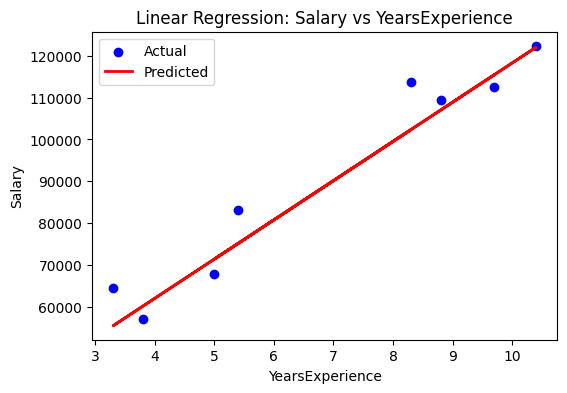

In [14]:
# Visualization
plt.figure(figsize=(6,4))
plt.scatter(X_test, Y_test, color='blue', label="Actual")
plt.plot(X_test, Y_pred, color='red', linewidth=2, label="Predicted")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs YearsExperience")
plt.legend()
plt.show()

In [15]:
# Predict a specific case
experience_years = 5
predicted_salary = model.predict([[experience_years]])
print(f"Predicted salary for {experience_years} years of experience: {predicted_salary[0]:.2f}")

Predicted salary for 5 years of experience: 71397.11


d:\Skills\Data_Science\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
